# Python Implementation : -

## Business Case: - To predict the flight ticket prices based on given  data

1 - Airline: Unique airline companies

2 - Date of Journey: Date of journey

3 - Source: Starting journey City.

4 - Destination: Final destination of the city.

5 - Route: Route

6 - Dep_Time: Time when flight started its journey.

7 - Arrival_Time: Time when flight landed

8 - Duration: Total time of the journey

9 - Total_Stops: Total number of stops during the journey

10 - Additional_Info: Information regarding meals etc.

11 - Price: Total cost of the journey

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
from datetime import datetime
from datetime import datetime, timedelta
import time
import re
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline
pd.pandas.reset_option('display.max_columns', None)
pd.pandas.reset_option('display.max_rows', None)

In [2]:
data=pd.read_excel(r'Flight_Fare.xlsx')##Loading dataset

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Domain Analysis

1.Airline: This attribute represents the name of the airline operating the flight, providing information about the service provider.

2.Date of Journey: It signifies the specific date on which the flight is scheduled to depart.

3.Source: This attribute indicates the originating location or city from where the flight departs.

4.Destination: It represents the final destination or city where the flight is scheduled to arrive.

5.Route: This attribute denotes the specific path or sequence of cities/airports the flight follows from the source to the destination.

6.Departure Time: It indicates the scheduled time of departure for the flight.

7.Arrival Time: This attribute signifies the expected time of arrival at the destination for the flight.

8.Duration: It represents the total duration or length of the flight in terms of hours and minutes.

9.Total Stops: This attribute provides information about the number of stops the flight will make during its journey from the source to the destination.

10.Additional Info: This attribute may contain additional details or special information related to the flight, such as in-flight services, specific instructions, or any notable exceptions.

11.Price: It represents the cost or price associated with the flight ticket.

# Basic Checks

In [4]:
data.head()#first five rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.tail()#last five rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
data.info()#to check null values and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc.

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
data.describe(include=['object'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [9]:
data.columns##Getting all columns from the dataset

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## EDA (Exploratory Data Analysis)

### Univariant analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

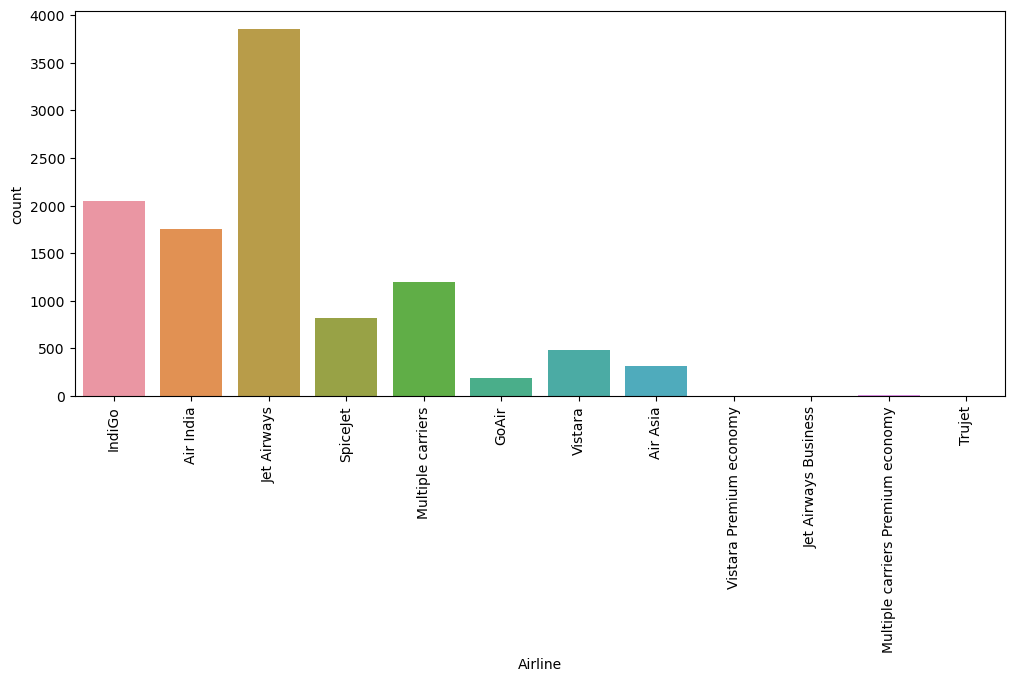

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(x='Airline',data=data)
plt.xticks(rotation=90)

Insights
* Jet Airways Bussiness Class has highest Price among all the other flighs
* all the total flight tickets sold, Jet Airways has the highest share followed by Indigo 

<AxesSubplot:xlabel='Source', ylabel='count'>

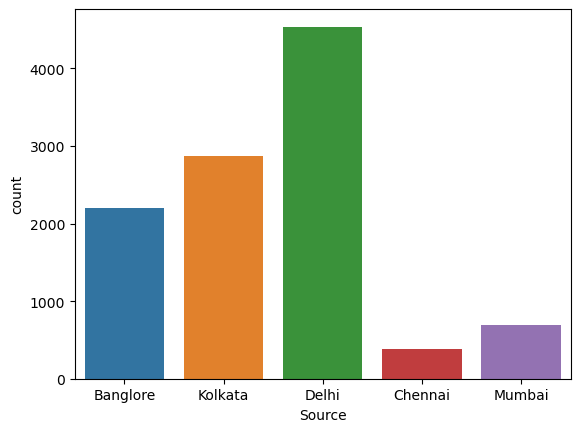

In [11]:
sns.countplot(x='Source',data=data)

<AxesSubplot:xlabel='Destination', ylabel='count'>

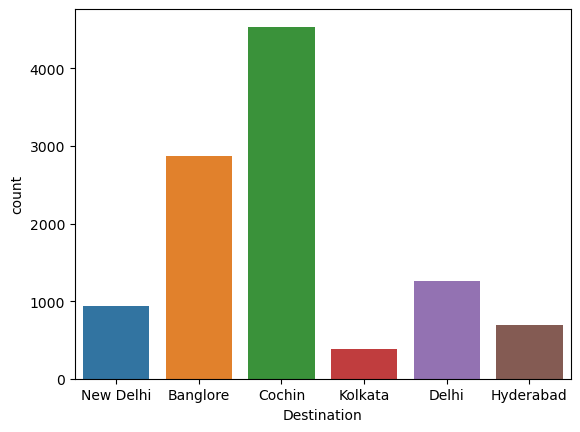

In [12]:
sns.countplot(x='Destination',data=data)

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

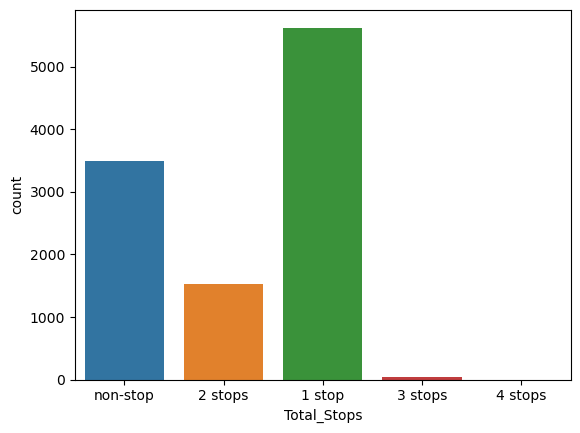

In [13]:
sns.countplot(x='Total_Stops',data=data)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

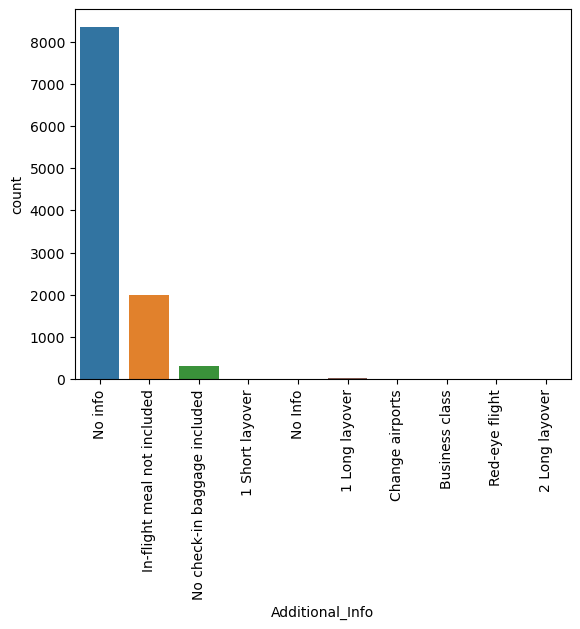

In [14]:
sns.countplot('Additional_Info',data=data)
plt.xticks(rotation=90)

In [15]:
pip install sweetviz ##installing sweetviz library`

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '##installing'


In [16]:
import sweetviz as sv#importing sweetviz library
my_report=sv.analyze(data)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Insights:--

* Most prices are in a range of up to 20000, but outliers are present.

* Jet Airways is the most frequent airline. However, Jet Airways Business has an average price much higher than the other lines.

* Delhi is where most flights depart from and has the highest average price.

* Cochin is the destination with the highest number of flights. However, New Delhi is the destination with the highest average price.

* A little more than half of the flights have only one stop and the greater the number of stops, the higher the average price.

## Data Preprocessing

In [17]:
data.isnull().sum()#null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are only two null values

* 1 in Route

* 1 in Total_Stops

In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Convert date, month and week

In [20]:
type('Date_of_Journey')#type

str

In [21]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])## Changing Date of Journey column Datatype

In [22]:
data['day']=data['Date_of_Journey'].dt.day 
data['week']=data['Date_of_Journey'].dt.week
data['month']=data['Date_of_Journey'].dt.month

### Convert (Dep_Time) hour and minute

In [23]:
type('Dep_Time')#type

str

In [24]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])## Changing Date of Journey column Datatype

In [25]:
data['Dep_hour']=data['Dep_Time'].dt.hour# Extracting Hours
data['Dep_min']=data['Dep_Time'].dt.minute# Extracting Minutes

### Convert (Arrival_Time)  hour and minute 

In [26]:
type('Arrival_Time')#type

str

In [27]:
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])## Changing Date of Journey column Datatype

In [28]:
data['Arrival_hour']=data['Arrival_Time'].dt.hour# Extracting Hours
data['Arrival_min']=data['Arrival_Time'].dt.minute# Extracting Minutes

In [29]:
type('Duration')

str

###  Assigning and converting Duration column into lis

In [30]:
data['Duration_hr']=data['Duration'].str.split(' ').str[0].str.split('h').str[0] # Extract hours from duration


In [31]:
data['Duration_min']=data['Duration'].str.split(' ').str[1].str.split('m').str[0] # Extracts only minutes from duration

In [32]:
data['Duration_min'].fillna('0',inplace=True)

In [33]:
data['Duration_hr'].str.contains('h').sum()

0

In [34]:
data['Duration_hr'].str.contains('m').sum()

1

In [35]:
data['Duration_min'].str.contains('h').sum()

0

In [36]:
data['Duration_min'].str.contains('m').sum()

0

In [37]:
data[data['Duration_hr'].str.contains('m')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hr,Duration_min
6474,Air India,2019-06-03,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2023-05-30 16:50:00,2023-05-30 16:55:00,5m,2 stops,No info,17327,3,23,6,16,50,16,55,5m,0


In [38]:
data.loc[[6474],'Duration_min']=data.loc[[6474],'Duration_hr']
data.loc[data['Duration_min']=='5m', 'Duration_min']=5

In [39]:
data['Duration_hr']=data['Duration_hr'].replace('5m','0')

In [40]:
data['Duration_hr'].str.contains('m').sum()

0

In [41]:
data[data['Duration_hr'].str.contains('m')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hr,Duration_min


In [42]:
data['Duration_hr']=data['Duration_hr'].astype(int)

In [43]:
data['Duration_min']=data['Duration_min'].astype(int)

In [44]:
data['Duration']=(data['Duration_hr']*60)+(data['Duration_min'])# Adding duration_hours and duration_mins list to train_data dataframe
data=data.drop(['Duration_hr','Duration_min'],axis=1)

In [45]:
data.head(6475)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-05-30 22:20:00,2023-03-22 01:10:00,170,non-stop,No info,3897,24,12,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-30 05:50:00,2023-05-30 13:15:00,445,2 stops,No info,7662,5,1,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-05-30 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882,6,36,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-05-30 18:05:00,2023-05-30 23:30:00,325,1 stop,No info,6218,5,49,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-05-30 16:50:00,2023-05-30 21:35:00,285,1 stop,No info,13302,3,1,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6470,Multiple carriers Premium economy,2019-03-21,Delhi,Cochin,DEL → BOM → COK,2023-05-30 08:55:00,2023-05-30 21:00:00,725,1 stop,No info,9845,21,12,3,8,55,21,0
6471,IndiGo,2019-01-05,Banglore,Delhi,BLR → DEL,2023-05-30 01:30:00,2023-05-30 04:15:00,165,non-stop,No info,4077,5,1,1,1,30,4,15
6472,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2023-05-30 07:30:00,2023-05-30 19:00:00,690,1 stop,No info,9315,21,21,5,7,30,19,0
6473,Jet Airways,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,2023-05-30 14:05:00,2023-05-30 23:35:00,570,1 stop,No info,14781,5,36,9,14,5,23,35


## To convert the categorical data to numerical data

In [46]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [47]:
data['Total_Stops']=data['Total_Stops'].replace({'1 stop':1, 'non-stop':0, '2 stops':2, '3 stops':3, '4 stops':4})

In [48]:
data.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [49]:
data["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [50]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-05-30 22:20:00,2023-03-22 01:10:00,170,0,No info,3897,24,12,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-30 05:50:00,2023-05-30 13:15:00,445,2,No info,7662,5,1,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-05-30 09:25:00,2023-06-10 04:25:00,1140,2,No info,13882,6,36,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-05-30 18:05:00,2023-05-30 23:30:00,325,1,No info,6218,5,49,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-05-30 16:50:00,2023-05-30 21:35:00,285,1,No info,13302,3,1,1,16,50,21,35


In [51]:
data["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [52]:
data.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

## Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder #using labelencoding
lc=LabelEncoder()

In [54]:
data.Route=lc.fit_transform(data.Route)

In [55]:
data.Airline=lc.fit_transform(data.Airline) 

In [56]:
data.Source=lc.fit_transform(data.Source)

In [57]:
data.Destination=lc.fit_transform(data.Destination)

## Drop

In [58]:
data.drop('Date_of_Journey',axis=1,inplace=True)# Since we have converted Date_of_Journey column into integers, Now we can drop it.

In [59]:
data.drop('Dep_Time',axis=1,inplace=True)# Drop Dep_Time as its info has been extracted

In [60]:
data.drop('Arrival_Time',axis=1,inplace=True)# Drop Arrival_Time

In [61]:
data.drop('Additional_Info',axis=1,inplace=True)#Drop Additional_Info

In [62]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,0,3897,24,12,3,22,20,1,10
1,1,3,0,84,445,2,7662,5,1,1,5,50,13,15
2,4,2,1,118,1140,2,13882,6,36,9,9,25,4,25
3,3,3,0,91,325,1,6218,5,49,12,18,5,23,30
4,3,0,5,29,285,1,13302,3,1,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,0,4107,4,36,9,19,55,22,25
10679,1,3,0,64,155,0,4145,27,17,4,20,45,23,20
10680,4,0,2,18,180,0,7229,27,17,4,8,20,11,20
10681,10,0,5,18,160,0,12648,3,1,1,11,30,14,10


## Feature Selection

In [63]:
data.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.013397,0.018446,0.025214,-0.159651,-0.199396,-0.039565,0.031118,-0.004945,-0.007900,-0.035269,-0.059922,-0.007567,-0.071092
Source,-0.013397,1.000000,-0.592576,0.403412,0.161886,0.192840,0.015999,0.007563,0.063667,0.063052,0.059047,-0.056998,0.025635,0.021040
Destination,0.018446,-0.592576,1.000000,-0.461176,-0.257352,-0.295476,-0.071122,-0.052102,-0.110361,-0.105035,-0.072997,0.127931,-0.039729,0.017196
Route,0.025214,0.403412,-0.461176,1.000000,0.288773,0.455130,0.164149,0.096601,0.051890,0.042194,-0.075002,-0.068071,0.013898,-0.173352
Duration,-0.159651,0.161886,-0.257352,0.288773,1.000000,0.738071,0.506480,-0.038360,0.052138,0.055136,0.002088,-0.019099,0.051531,-0.069663
Total_Stops,-0.199396,0.192840,-0.295476,0.455130,0.738071,1.000000,0.603897,-0.024136,0.064343,0.065495,-0.061476,-0.002618,0.038140,-0.106940
Price,-0.039565,0.015999,-0.071122,0.164149,0.506480,0.603897,1.000000,-0.165448,-0.004530,0.010705,0.006799,-0.024458,0.024244,-0.086155
day,0.031118,0.007563,-0.052102,0.096601,-0.038360,-0.024136,-0.165448,1.000000,-0.172908,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423
week,-0.004945,0.063667,-0.110361,0.051890,0.052138,0.064343,-0.004530,-0.172908,1.000000,0.995367,0.028604,0.000552,-0.004759,-0.028573
month,-0.007900,0.063052,-0.105035,0.042194,0.055136,0.065495,0.010705,-0.264896,0.995367,1.000000,0.028189,0.002136,-0.004329,-0.025786


<AxesSubplot:>

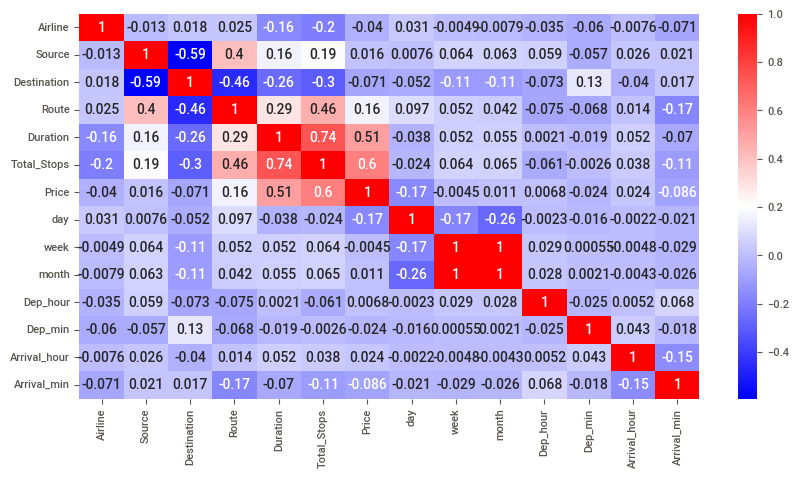

In [64]:
plt.figure(figsize=(10,5))## Checking correlation
sns.heatmap(data.corr(),annot=True,linecolor='pink',cmap='bwr')# Finds correlation between Independent and dependent attributes

## Model Creation

### Linear Regression

In [65]:
## creating X and y
x=data.drop('Price',axis=1)

In [66]:
x

,Airline,Source,Destination,Route,Duration,Total_Stops,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,0,24,12,3,22,20,1,10
1,1,3,0,84,445,2,5,1,1,5,50,13,15
2,4,2,1,118,1140,2,6,36,9,9,25,4,25
3,3,3,0,91,325,1,5,49,12,18,5,23,30
4,3,0,5,29,285,1,3,1,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,0,4,36,9,19,55,22,25
10679,1,3,0,64,155,0,27,17,4,20,45,23,20
10680,4,0,2,18,180,0,27,17,4,8,20,11,20
10681,10,0,5,18,160,0,3,1,1,11,30,14,10


In [67]:
y=data.Price

In [68]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [69]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

In [70]:
x_train

,Airline,Source,Destination,Route,Duration,Total_Stops,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
5,8,3,0,64,145,0,24,26,6,9,0,11,25
874,6,2,1,104,910,1,27,26,6,10,20,1,30
10302,0,3,0,64,150,0,24,12,3,19,35,22,5
8577,4,3,0,66,800,1,5,36,9,6,30,19,50
1052,0,2,1,103,865,1,18,20,5,16,45,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,10,1,4,127,135,0,3,23,6,7,5,9,20
578,4,2,1,104,660,1,15,24,6,8,0,19,0
5848,4,2,1,113,910,2,5,36,9,21,25,12,35
2439,6,2,1,104,665,1,27,13,3,9,55,21,0


In [71]:
x_test

,Airline,Source,Destination,Route,Duration,Total_Stops,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
5324,4,3,0,66,1025,1,15,20,5,18,55,12,0
2538,1,2,1,112,1580,2,18,20,5,7,5,9,25
3601,4,2,1,97,1195,2,27,26,6,23,5,19,0
8402,3,3,0,64,165,0,18,20,5,9,35,12,20
2674,4,3,0,73,1080,1,6,23,6,20,25,14,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,4,3,0,66,330,1,6,23,6,6,30,12,0
2700,1,0,5,5,830,1,3,49,12,6,45,20,35
5620,8,3,0,89,435,1,6,49,12,11,35,18,50
8868,4,3,0,66,735,1,6,49,12,20,0,8,15


In [72]:
y_train

5         3873
874       6270
10302     5964
8577     14781
1052      7353
         ...  
57        7414
578      14714
5848     11507
2439     12537
7188     13759
Name: Price, Length: 8011, dtype: int64

In [73]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8011, 13)
(8011,)
(2671, 13)
(2671,)


In [74]:
## importing the model library
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [75]:
y_pred=lr.predict(x_test)

In [76]:
y_pred

array([10072.44268599, 13057.97044335, 13663.90140068, ...,
        9239.19705842,  9831.49887098, 10163.19453125])

In [77]:
x_test

,Airline,Source,Destination,Route,Duration,Total_Stops,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
5324,4,3,0,66,1025,1,15,20,5,18,55,12,0
2538,1,2,1,112,1580,2,18,20,5,7,5,9,25
3601,4,2,1,97,1195,2,27,26,6,23,5,19,0
8402,3,3,0,64,165,0,18,20,5,9,35,12,20
2674,4,3,0,73,1080,1,6,23,6,20,25,14,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,4,3,0,66,330,1,6,23,6,6,30,12,0
2700,1,0,5,5,830,1,3,49,12,6,45,20,35
5620,8,3,0,89,435,1,6,49,12,11,35,18,50
8868,4,3,0,66,735,1,6,49,12,20,0,8,15


In [78]:
y_test

5324    10844
2538    10975
3601    12819
8402     4804
2674    10539
        ...  
241     10844
2700    12127
5620     8479
8868     8529
2456    10539
Name: Price, Length: 2671, dtype: int64

In [79]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [80]:
mse=mean_squared_error(y_test,y_pred)
mse

11792062.742578521

In [81]:
mae=mean_absolute_error(y_test,y_pred)
mae

2486.317964252438

In [82]:
import math

In [83]:
rmse=math.sqrt(mae)
rmse

49.86299193041306

In [84]:
r2=r2_score(y_test,y_pred)
r2

0.45276744323485996

In [85]:
adj_r2=1-(1-r2)*(2671-1)/(2671-13-1)
adj_r2

0.4500899787117336

## KNN

In [86]:
x=data.drop('Price',axis=1)
x

,Airline,Source,Destination,Route,Duration,Total_Stops,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,0,24,12,3,22,20,1,10
1,1,3,0,84,445,2,5,1,1,5,50,13,15
2,4,2,1,118,1140,2,6,36,9,9,25,4,25
3,3,3,0,91,325,1,5,49,12,18,5,23,30
4,3,0,5,29,285,1,3,1,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,0,4,36,9,19,55,22,25
10679,1,3,0,64,155,0,27,17,4,20,45,23,20
10680,4,0,2,18,180,0,27,17,4,8,20,11,20
10681,10,0,5,18,160,0,3,1,1,11,30,14,10


In [87]:
y=data.Price
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [88]:
data.shape

(10682, 14)

In [89]:
data.Price.value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [91]:
x_scaled

array([[0.27272727, 0.        , 1.        , ..., 0.36363636, 0.04347826,
        0.18181818],
       [0.09090909, 0.75      , 0.        , ..., 0.90909091, 0.56521739,
        0.27272727],
       [0.36363636, 0.5       , 0.2       , ..., 0.45454545, 0.17391304,
        0.45454545],
       ...,
       [0.36363636, 0.        , 0.4       , ..., 0.36363636, 0.47826087,
        0.36363636],
       [0.90909091, 0.        , 1.        , ..., 0.54545455, 0.60869565,
        0.18181818],
       [0.09090909, 0.5       , 0.2       , ..., 1.        , 0.82608696,
        0.27272727]])

In [92]:
from sklearn.model_selection import train_test_split## splitting the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=33)

In [93]:
x_train

array([[0.72727273, 0.75      , 0.        , ..., 0.        , 0.47826087,
        0.45454545],
       [0.54545455, 0.5       , 0.2       , ..., 0.36363636, 0.04347826,
        0.54545455],
       [0.        , 0.75      , 0.        , ..., 0.63636364, 0.95652174,
        0.09090909],
       ...,
       [0.36363636, 0.5       , 0.2       , ..., 0.45454545, 0.52173913,
        0.63636364],
       [0.54545455, 0.5       , 0.2       , ..., 1.        , 0.91304348,
        0.        ],
       [0.36363636, 0.75      , 0.        , ..., 0.81818182, 0.69565217,
        0.36363636]])

In [94]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [95]:
y_pred=KNN.predict(x_test)

In [96]:
y_test

5324    10844
2538    10975
3601    12819
8402     4804
2674    10539
        ...  
241     10844
2700    12127
5620     8479
8868     8529
2456    10539
Name: Price, Length: 2671, dtype: int64

In [97]:
(y_test!=y_pred).sum()

2625

In [98]:
len(y_test)

2671

In [99]:
(y_test!=y_pred).sum()/len(y_test)

0.9827779857731187

In [100]:
## taking optimal k to determine how many nearest neighbors  to create
# create a list to store the error values for each k
ERROR_RATE=[]
for i in range(1,13):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    error_rate=(y_test!=y_pred).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [101]:
ERROR_RATE

[0.7510295769374766,
 0.9041557469112692,
 0.9520778734556345,
 0.971546237364283,
 0.9827779857731187,
 0.9902658180456758,
 0.9951329090228379,
 0.9962560838637214,
 0.9966304754773493,
 0.997379258704605,
 0.9988768251591165,
 0.9996256083863722]

Text(0, 0.5, 'Error Rate')

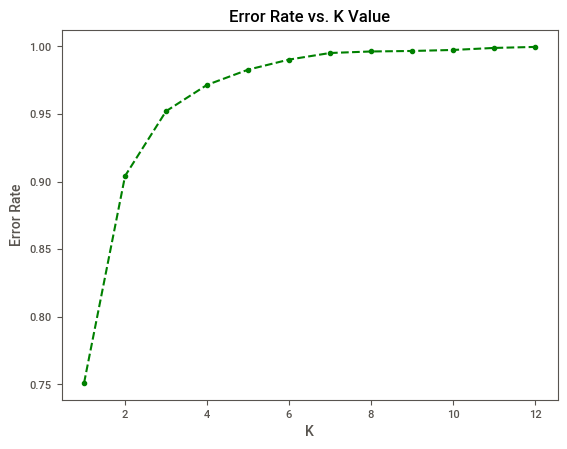

In [102]:
# Lets plot the k-value and error rate
plt.plot(range(1,13),ERROR_RATE,color='green',marker='o',linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [103]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [104]:
y_pred=KNN.predict(x_test)

In [105]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [106]:
mse=mean_squared_error(y_test,y_pred)
mse

7193331.000793709

In [107]:
mae=mean_absolute_error(y_test,y_pred)
mae

1733.9760389367277

In [108]:
r2=r2_score(y_test,y_pred)
r2

0.6661801246181698

In [109]:
r2=r2_score(y_test,y_pred)
r2

0.6661801246181698

In [110]:
adj_r2=1-(1-r2)*(2671-1)/(2671-13-1)
adj_r2

0.6645468320400878

# Dicision Tree

In [111]:
x=data.drop('Price',axis=1)#independent variable 
y=data.Price#dependent variable 

In [112]:
data.Price.value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split# preparing training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25,random_state=33)

In [114]:
x_train

,Airline,Source,Destination,Route,Duration,Total_Stops,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
5,8,3,0,64,145,0,24,26,6,9,0,11,25
874,6,2,1,104,910,1,27,26,6,10,20,1,30
10302,0,3,0,64,150,0,24,12,3,19,35,22,5
8577,4,3,0,66,800,1,5,36,9,6,30,19,50
1052,0,2,1,103,865,1,18,20,5,16,45,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,10,1,4,127,135,0,3,23,6,7,5,9,20
578,4,2,1,104,660,1,15,24,6,8,0,19,0
5848,4,2,1,113,910,2,5,36,9,21,25,12,35
2439,6,2,1,104,665,1,27,13,3,9,55,21,0


In [115]:
x_test

,Airline,Source,Destination,Route,Duration,Total_Stops,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
5324,4,3,0,66,1025,1,15,20,5,18,55,12,0
2538,1,2,1,112,1580,2,18,20,5,7,5,9,25
3601,4,2,1,97,1195,2,27,26,6,23,5,19,0
8402,3,3,0,64,165,0,18,20,5,9,35,12,20
2674,4,3,0,73,1080,1,6,23,6,20,25,14,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,4,3,0,66,330,1,6,23,6,6,30,12,0
2700,1,0,5,5,830,1,3,49,12,6,45,20,35
5620,8,3,0,89,435,1,6,49,12,11,35,18,50
8868,4,3,0,66,735,1,6,49,12,20,0,8,15


In [116]:
y_train

5         3873
874       6270
10302     5964
8577     14781
1052      7353
         ...  
57        7414
578      14714
5848     11507
2439     12537
7188     13759
Name: Price, Length: 8011, dtype: int64

In [117]:
x_train

,Airline,Source,Destination,Route,Duration,Total_Stops,day,week,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
5,8,3,0,64,145,0,24,26,6,9,0,11,25
874,6,2,1,104,910,1,27,26,6,10,20,1,30
10302,0,3,0,64,150,0,24,12,3,19,35,22,5
8577,4,3,0,66,800,1,5,36,9,6,30,19,50
1052,0,2,1,103,865,1,18,20,5,16,45,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,10,1,4,127,135,0,3,23,6,7,5,9,20
578,4,2,1,104,660,1,15,24,6,8,0,19,0
5848,4,2,1,113,910,2,5,36,9,21,25,12,35
2439,6,2,1,104,665,1,27,13,3,9,55,21,0


In [118]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()#object creation for decision tree
dt.fit(x_train,y_train)#training the model

DecisionTreeRegressor()

In [119]:
y_hat=dt.predict(x_test)#prediction
y_hat#predicted values

array([10844.  , 10975.  , 11567.25, ...,  8479.  , 13044.  , 11615.5 ])

In [120]:
y_train_predict=dt.predict(x_train)
y_train_predict

array([ 3873.,  6270.,  5964., ..., 11507., 12537., 11895.])

In [121]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [122]:
mse=mean_squared_error(y_test,y_hat)
mse

5587878.710990474

In [123]:
mse=mean_absolute_error(y_test,y_hat)
mse

1302.1666666666665

In [124]:
r2=r2_score(y_test,y_hat)

In [125]:
r2

0.7406841177271279

In [126]:
adj_r2=1-(1-r2)*(2671-1)/(2671-13-1)
adj_r2

0.7394153535308361

## Random Forest

In [127]:
from sklearn.ensemble import RandomForestRegressor


rf_clf=RandomForestRegressor(n_estimators=100)
rf_clf.fit(x_train,y_train)

RandomForestRegressor()

In [128]:
y_predict=rf_clf.predict(x_test)
y_predict

array([11996.60516667, 11034.56507143, 11593.0568824 , ...,
        8563.89      , 12335.22      , 12175.22316667])

In [129]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [130]:
mse=mean_squared_error(y_test,y_predict)

In [131]:
mse

4050454.6856713505

In [132]:
mae=mean_absolute_error(y_test,y_predict)
mae

1141.499550628092

In [133]:
r2=r2_score(y_test,y_predict)

In [134]:
r2

0.8120311329672765

In [135]:
adj_r2=1-(1-r2)*(2671-1)/(2671-13-1)
adj_r2

0.8111114508929727

In [136]:
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [137]:
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [138]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestRegressor(random_state=33)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=33, n_jobs=-1)

In [139]:
rf_cv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=33),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=33, scoring='f1', verbose=2)

In [140]:
rf_best_params=rf_cv.best_params_
print(f"Best paramters: {rf_best_params}")

Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}


In [141]:
rf_clf2 = RandomForestRegressor(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 110, bootstrap = False)#passing best parameter to randomforest
rf_clf2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=110, max_features='sqrt',
                      n_estimators=200)

In [142]:
y_predict=rf_clf2.predict(x_test)

In [143]:
r2=r2_score(y_test,y_predict)
r2

0.7875995852767846

In [144]:
y_predict_train=rf_clf.predict(x_train)+
y_predict_train

array([ 3868.664     ,  6367.97      ,  6464.75      , ...,
       12664.4725    , 10952.65      , 11918.00633333])

In [145]:
r2_train=r2_score(y_train,y_train_predict)#checking performance
r2_train

0.9702428655554296

### Comparison of the Best Models Evaluated by Cross Validation

* LinearRegressor - CV: 0.45

* KNeighborsRegressor - CV: 0.66

* DecisionTreeRegressor - CV: 0.72

* RandomForestRegressor - CV: 0.97

## Conclusion

* The best model is Random Forest with a r2_score of 0.97
* Some of the best feature are Duration_min, Additional_Info, Airline_Jet, Depature (Hour/Day), Route.
* It is quite suprirsing that Departure (hour & day) features are ranked in the top few as our initial EDA did not suggest clear difference towards prices. (Perhaps the label coding may have caused for some overfitting).
